# Motion raw sensor data visualization
Suppose having the integral 

f(x) = Integral 0 1 e^-x^2

imagining the f(x) represnset the motion sensor output data based in time: 

| Min      | Sensor  |
| :--------| -------:|
| 0        | 2       |
| 1        | 8       |
| 2        | 22      |
| 3        | 12      |

Here is example raw data we have from the sensor, but here we need to solve the integral first and we do not have any data avaliable.
I will use trapezoidal and simsons method to solve the integral. 

given n = 4 as the intervall increase the more accurate function we recieve. 

h = b - a / h  => 1 - 0 / 4 = 0.25 

then we have the following steps : 

Here we define a function return the function formula. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Integral from-to
a , b = 0 , 1 
#Function return our function example which the exponent represent the sensor data with time
def f(x):
    return np.exp(-x**2)

Trapezoidal Function

In [3]:
#Calculating the trapezoidal method. The function expected a h value and list of noes representing the integral step
#loop range start from the second element of array and end with left last element. Therfoe having {(arr_nodes) - 1} 
#intern_trapezoidal the value we add together inside the trapezoidal step 2 * f(xn) where a < n < b
#cal_trap_step multiplty the f(xn) where a < n < b with (2) following trapezoidal formula
#Finally adding all together with res_trap [0] return first element , [-1] return last element of array. 
#y_values_y holding the trapezoidal step result for plotting, defin it as golbal to be modify in function
y_values_trapezoidal = []
def trapezoidal(h, arr_nodes):
    intern_trapezoidal = 0
    list_intern = []
    for nodes in range(1, len(arr_nodes)-1):
        cal_trap_step = (2*arr_nodes[nodes])
        list_intern.append(float(cal_trap_step))
        intern_trapezoidal += cal_trap_step
    
    res_trap = h/2 * (arr_nodes[0] + intern_trapezoidal + arr_nodes[-1])

    global y_values_trapezoidal
    y_values_trapezoidal = [float(arr_nodes[0])] + list_intern + [float(arr_nodes[-1])]

    return float(res_trap)

Calling Trapezoidal Method and plotting the function

╔═══════════════════════════════════════════════════════════════╗
║             Trapezoidal Rule Integration Results              ║
╚═══════════════════════════════════════════════════════════════╝

➤ Trapezoidal estimate value is: 0.743

➤ The integral steps (x values):
  0.000, 0.250, 0.500, 0.750, 1.000

➤ Function evaluations at each step:
  --------------------------------------------------
  f(x0) = 1.000 at x = 0.000
  f(x1) = 0.939 at x = 0.250
  f(x2) = 0.779 at x = 0.500
  f(x3) = 0.570 at x = 0.750
  f(x4) = 0.368 at x = 1.000

*****************************************************************


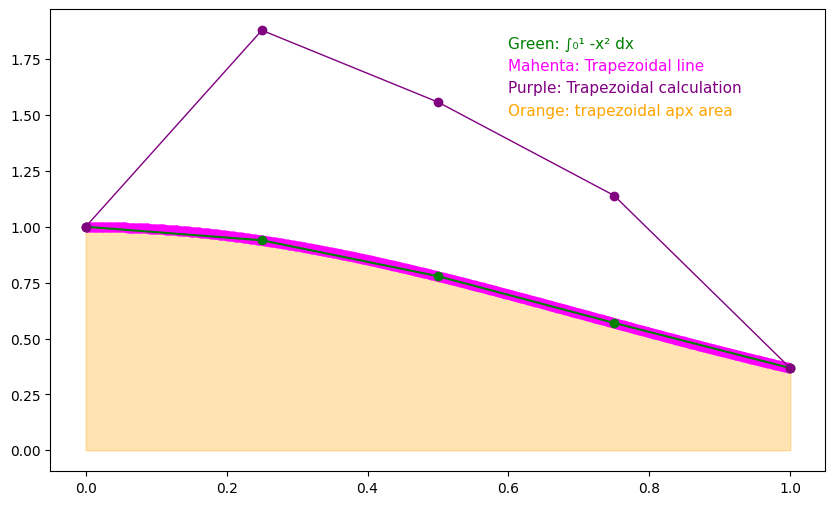

In [29]:
from colorama import Fore, Style, init
init(autoreset=True)
#subintervals (must be even for simsons method)
n = 4
h = (b - a) / n
#the numpy.linspace will return value between a and b with interval of (n)
x_nodes = np.linspace(a, b, n + 1)
#setting the step value into the function
y_nodes = f(x_nodes)

#calulcating with trapezoidal method
res = trapezoidal(h, y_nodes)
print(Fore.CYAN + "╔═══════════════════════════════════════════════════════════════╗")
print(Fore.CYAN + "║             Trapezoidal Rule Integration Results              ║")
print(Fore.CYAN + "╚═══════════════════════════════════════════════════════════════╝\n")

print(Fore.YELLOW + f"➤ Trapezoidal estimate value is: {res:.3f}\n")

x_values_trapezoidal = x_nodes
print(Fore.GREEN + "➤ The integral steps (x values):")
print("  " + ", ".join([f"{x:.3f}" for x in x_values_trapezoidal]) + "\n")

print(Fore.MAGENTA + "➤ Function evaluations at each step:")
print(Fore.MAGENTA + "  " + "-" * 50)

for i, x in enumerate(x_values_trapezoidal):
    print(f"  f(x{i}) = {f(x):.3f} at x = {x:.3f}")

print(Fore.CYAN + "\n" + "*" * 65)
# Plot function
x_dense = np.linspace(a, b, 800)
y_dense = f(x_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense, 'o-', label='∫ e^(-x^2) dx', linewidth=4, color='magenta')
plt.plot(x_nodes, y_nodes, 'o-', label='Sample points', color='green')
plt.plot(x_values_trapezoidal, y_values_trapezoidal, 'o-', label='f(x) values', linewidth=1, color='purple')
plt.fill_between(x_nodes, y_nodes, alpha=0.3, color='orange', label=f'Trapezoidal area ≈ {res}')

plt.text(x=0.6, y=1.8, s='Green: ∫₀¹ -x² dx', color='green', fontsize=11)
plt.text(x=0.6, y=1.7, s='Mahenta: Trapezoidal line', fontsize=11 , color='magenta')
plt.text(x=0.6, y=1.6, s='Purple: Trapezoidal calculation', fontsize=11, color='purple')
plt.text(x=0.6, y=1.5, s='Orange: trapezoidal apx area', fontsize=11, color='orange')


plt.show()

Simsons Method

In [49]:
y_values_simsons = []
def simSons(h, arr_nodes):
    intern_simsons = 0
    list_intern = []
    
    for nodes in range(1, len(arr_nodes)-1):
        if(nodes % 2 != 0):
            cal_trap_step = (4*arr_nodes[nodes])
            list_intern.append(float(cal_trap_step))
            intern_simsons += cal_trap_step
        elif(nodes%2 ==0):
            cal_trap_step = (2*arr_nodes[nodes])
            list_intern.append(float(cal_trap_step))
            intern_simsons += cal_trap_step
        
    
    res_simsons = h/3 * (arr_nodes[0] + intern_simsons + arr_nodes[-1])

    global y_values_simsons
    y_values_simsons = [float(arr_nodes[0])] + list_intern + [float(arr_nodes[-1])]
    
    return float(res_simsons)

Calling Simsons Method and plotting the function

╔═══════════════════════════════════════════════════════════════╗
║             Simpson's Rule Integration Results                ║
╚═══════════════════════════════════════════════════════════════╝

➤ Simpson's estimate value is: 0.747

➤ The integral steps (x values):
  0.000, 0.250, 0.500, 0.750, 1.000

➤ Function evaluations at each step:
  --------------------------------------------------
  f(x0) = 1.000 at x = 0.000
  f(x1) = 0.939 at x = 0.250
  f(x2) = 0.779 at x = 0.500
  f(x3) = 0.570 at x = 0.750
  f(x4) = 0.368 at x = 1.000

*****************************************************************


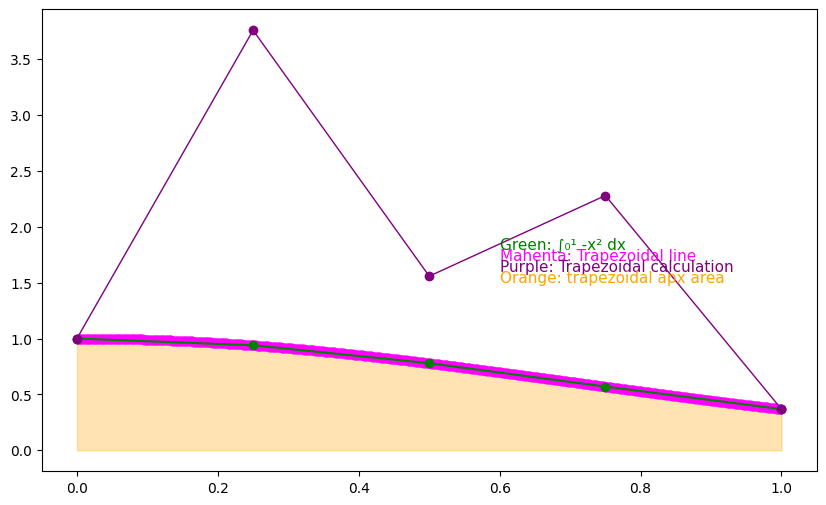

In [ ]:
#calulcating with trapezoidal method
res = simSons(h, y_nodes)
print(Fore.CYAN + "╔═══════════════════════════════════════════════════════════════╗")
print(Fore.CYAN + "║             Simpson's Rule Integration Results                ║")
print(Fore.CYAN + "╚═══════════════════════════════════════════════════════════════╝\n")
x_values_simsons = x_nodes
print(Fore.YELLOW + f"➤ Simpson's estimate value is: {res:.3f}\n")

print(Fore.GREEN + "➤ The integral steps (x values):")
print("  " + ", ".join([f"{x:.3f}" for x in x_values_simsons]) + "\n")

print(Fore.MAGENTA + "➤ Function evaluations at each step:")
print(Fore.MAGENTA + "  " + "-" * 50)

for i, x in enumerate(x_values_simsons):
    print(f"  f(x{i}) = {f(x):.3f} at x = {x:.3f}")

print(Fore.CYAN + "\n" + "*" * 65)
# Plot function
x_dense = np.linspace(a, b, 800)
y_dense = f(x_dense)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense, 'o-', label='∫ e^(-x^2) dx', linewidth=4, color='magenta')
plt.plot(x_nodes, y_nodes, 'o-', label='Sample points', color='green')
plt.plot(x_values_simsons, y_values_simsons, 'o-', label='f(x) values', linewidth=1, color='purple')
plt.fill_between(x_nodes, y_nodes, alpha=0.3, color='orange', label=f'Trapezoidal area ≈ {res}')

plt.text(x=0.6, y=3.8, s='Green: ∫₀¹ -x² dx', color='green', fontsize=11)
plt.text(x=0.6, y=3.6, s='Mahenta: Simsons line', fontsize=11 , color='magenta')
plt.text(x=0.6, y=3.4, s='Purple: Simsons step calculation', fontsize=11, color='purple')
plt.text(x=0.6, y=3.2, s='Orange: Simsons apx area', fontsize=11, color='orange')


plt.show()